## Choosing the best number of Clusters

In [2]:
import numpy as np
import pandas as pd
#gensim
from gensim.models.poincare import PoincareModel, PoincareKeyedVectors
from gensim.test.utils import datapath
from gensim.utils import check_output
from collections import Counter, defaultdict
import itertools
import logging
from gensim import utils, matutils
import csv

#python files
import Evaluation
import Visualization
import LinkPrediction
import KMeans_Poincare
import Load_Preprocessing

#interaction
import ipywidgets as widgets
from ipywidgets import interact, interact_manual


In [3]:
model = Load_Preprocessing.load_poincare_gensim("output_file_200D_20N_0B_0R_200Ep.tsv")
#making the category together with the vector
dict_cat_coord = dict(zip(model.index_to_key, model.vectors))

Iteration: 0 - Best Inertia: 2.3127874121847647
Iteration: 1 - Best Inertia: 2.3127874121847647
Iteration: 2 - Best Inertia: 1.906262007787501
Iteration: 3 - Best Inertia: 1.906262007787501
Iteration: 4 - Best Inertia: 1.906262007787501
Iteration: 5 - Best Inertia: 1.906262007787501
Iteration: 6 - Best Inertia: 1.906262007787501
Iteration: 7 - Best Inertia: 1.841132205159626
Iteration: 8 - Best Inertia: 1.841132205159626
Iteration: 9 - Best Inertia: 1.841132205159626
Iteration: 10 - Best Inertia: 1.841132205159626
Iteration: 11 - Best Inertia: 1.841132205159626
Iteration: 12 - Best Inertia: 1.841132205159626
Iteration: 13 - Best Inertia: 1.7483911588669487
Iteration: 14 - Best Inertia: 1.7483911588669487
Iteration: 15 - Best Inertia: 1.7483911588669487
Iteration: 16 - Best Inertia: 1.7483911588669487
Iteration: 17 - Best Inertia: 1.7483911588669487
Iteration: 18 - Best Inertia: 1.7483911588669487
Iteration: 19 - Best Inertia: 1.7483911588669487
Iteration: 20 - Best Inertia: 1.748391158

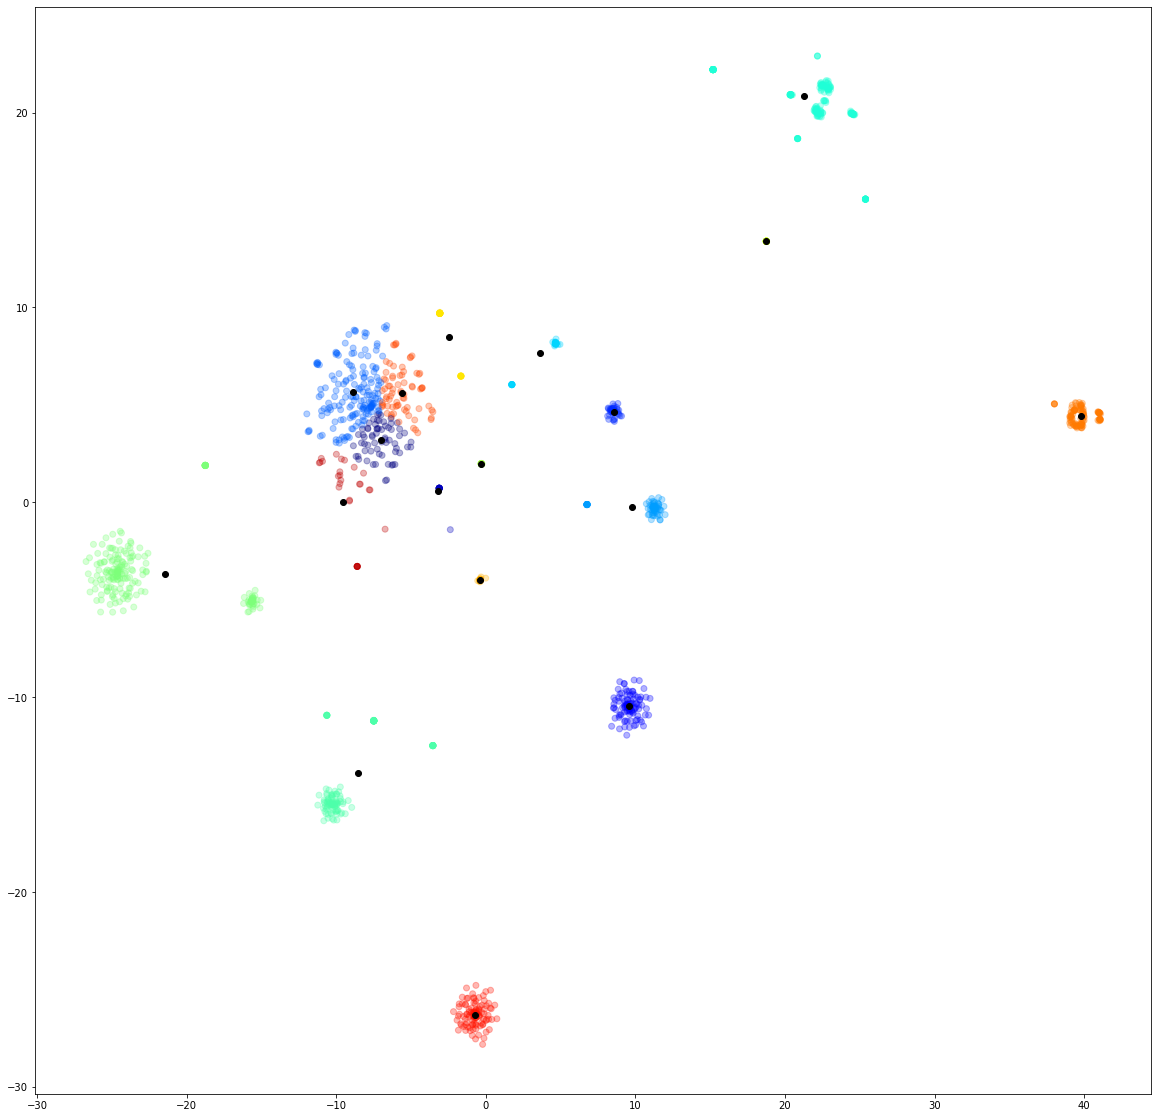

In [7]:
from KMeans_Poincare_2d import PoincareKMeans
from KMeans_Poincare_2d import PoincareKMeans
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
colormap = get_cmap('jet')
points1 = z

model_kmeans_2d = PoincareKMeans(n_clusters=18,n_init=100,max_iter=200,tol=1e-10,verbose=True)
model_kmeans_2d.fit_predict(points1)
clust_labels_2d = model_kmeans_2d.labels_
centroids_2d = model_kmeans_2d.cluster_centers_

colors = [colormap(x/model_kmeans_2d.n_clusters) for x in clust_labels_2d]

plt.figure(figsize=(20,20))
plt.scatter(points1[:,0],points1[:,1],alpha=0.3,c=colors)

for i in range(model_kmeans_2d.n_clusters):
    plt.scatter(centroids_2d[i,0],centroids_2d[i,1],alpha=1.0,c="black")
plt.show()

1. Number of clusters = 15

In [3]:
from KMeans_Poincare import PoincareKMeans

points = np.loadtxt("coordinates.csv", delimiter=',', skiprows=1)

model_kmeans = PoincareKMeans(n_clusters=15,n_init=100,max_iter=200,tol=1e-10,verbose=True)
model_kmeans.fit_predict(points)
clust_labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_

Iteration: 0 - Best Inertia: 72916.16225305786
Iteration: 1 - Best Inertia: 72916.16225305786
Iteration: 2 - Best Inertia: 72592.30631097584
Iteration: 3 - Best Inertia: 72592.30631097584
Iteration: 4 - Best Inertia: 72319.44839502306
Iteration: 5 - Best Inertia: 72319.44839502306
Iteration: 6 - Best Inertia: 72187.56869514541
Iteration: 7 - Best Inertia: 72187.56869514541
Iteration: 8 - Best Inertia: 70285.45303680084
Iteration: 9 - Best Inertia: 70285.45303680084
Iteration: 10 - Best Inertia: 70285.45303680084
Iteration: 11 - Best Inertia: 70285.45303680084
Iteration: 12 - Best Inertia: 70285.45303680084
Iteration: 13 - Best Inertia: 70285.45303680084
Iteration: 14 - Best Inertia: 70285.45303680084
Iteration: 15 - Best Inertia: 70285.45303680084
Iteration: 16 - Best Inertia: 70285.45303680084
Iteration: 17 - Best Inertia: 70285.45303680084
Iteration: 18 - Best Inertia: 70285.45303680084
Iteration: 19 - Best Inertia: 70285.45303680084
Iteration: 20 - Best Inertia: 70285.45303680084
It

In [4]:
res = dict(zip(dict_cat_coord.keys(), clust_labels))
df_cluster = pd.DataFrame.from_dict(res,orient='index', columns=["cluster"])
df_cluster.dropna(how="all", axis=0, inplace=True)

In [5]:
#Show the categories in each cluster
@interact
def show_articles_more_than(column='cluster', x=(0,14,1)):
    return df_cluster.loc[df_cluster[column] == x]

interactive(children=(Text(value='cluster', description='column'), IntSlider(value=7, description='x', max=14)…

In [4]:
from sklearn.manifold import TSNE
points = np.loadtxt("coordinates.csv", delimiter=',', skiprows=1)

tsne = TSNE(n_components=2, verbose=1, random_state=123, perplexity=100, n_iter=5000)
z = tsne.fit_transform(points)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 1563 samples in 0.001s...
[t-SNE] Computed neighbors for 1563 samples in 0.095s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1563
[t-SNE] Computed conditional probabilities for sample 1563 / 1563
[t-SNE] Mean sigma: 0.401696
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.813915
[t-SNE] KL divergence after 2550 iterations: 0.303704


In [5]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame()

df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Data T-SNE projection") 

#This shows how the points are distributed between the 2d graph

[Text(0.5, 1.0, 'Data T-SNE projection')]

Iteration: 0 - Best Inertia: 2.2415807555607135
Iteration: 1 - Best Inertia: 1.998482147762366
Iteration: 2 - Best Inertia: 1.998482147762366
Iteration: 3 - Best Inertia: 1.998482147762366
Iteration: 4 - Best Inertia: 1.998482147762366
Iteration: 5 - Best Inertia: 1.998482147762366
Iteration: 6 - Best Inertia: 1.998482147762366
Iteration: 7 - Best Inertia: 1.998482147762366
Iteration: 8 - Best Inertia: 1.998482147762366
Iteration: 9 - Best Inertia: 1.998482147762366
Iteration: 10 - Best Inertia: 1.998482147762366
Iteration: 11 - Best Inertia: 1.998482147762366
Iteration: 12 - Best Inertia: 1.912817361682373
Iteration: 13 - Best Inertia: 1.912817361682373
Iteration: 14 - Best Inertia: 1.912817361682373
Iteration: 15 - Best Inertia: 1.912817361682373
Iteration: 16 - Best Inertia: 1.912817361682373
Iteration: 17 - Best Inertia: 1.912817361682373
Iteration: 18 - Best Inertia: 1.912817361682373
Iteration: 19 - Best Inertia: 1.912817361682373
Iteration: 20 - Best Inertia: 1.912817361682373
I

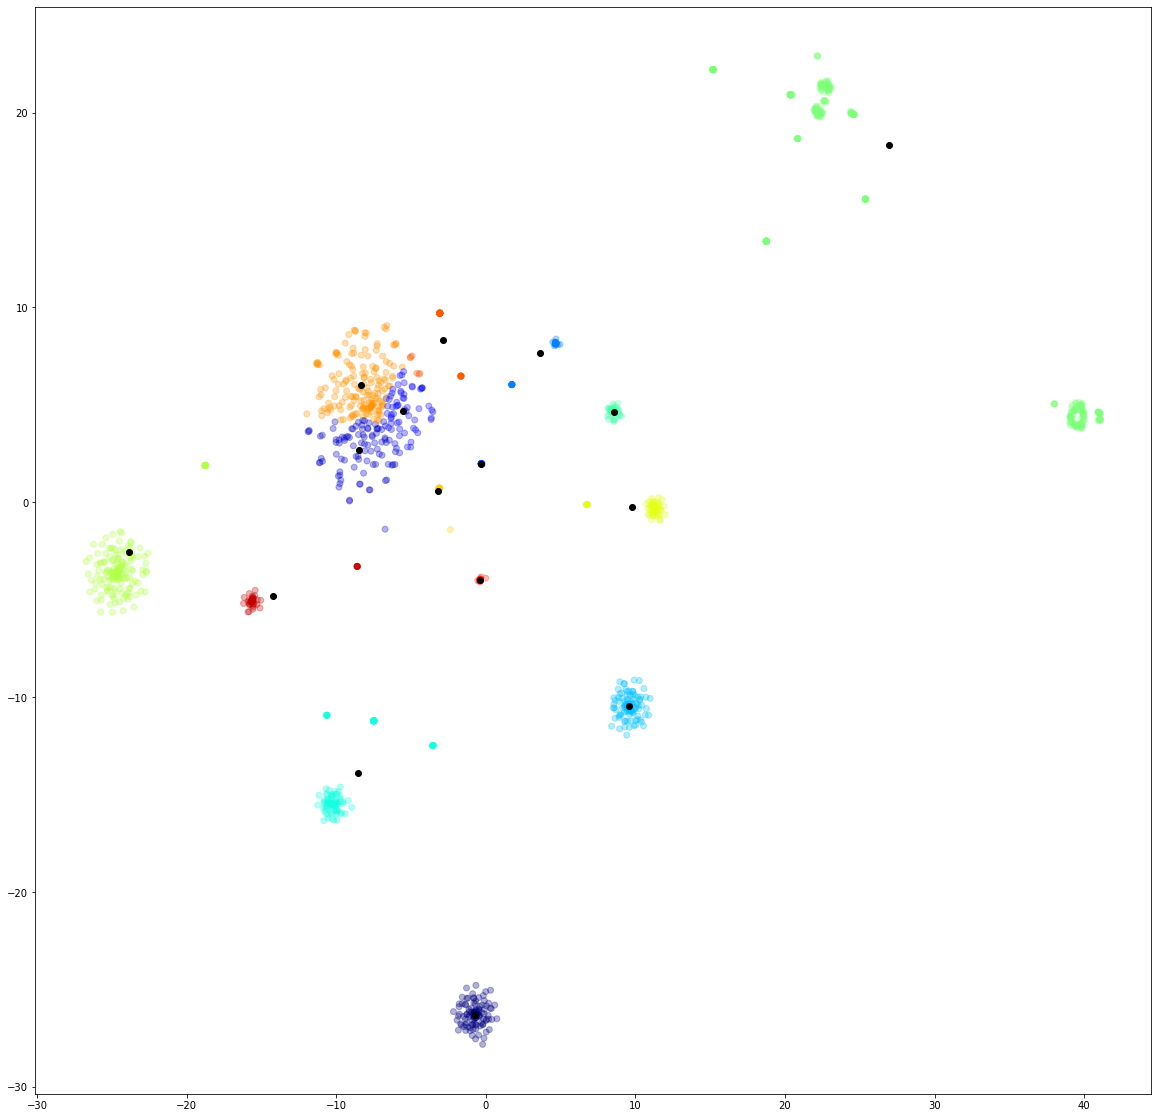

In [21]:
#Now plot
from KMeans_Poincare_2d import PoincareKMeans
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
colormap = get_cmap('jet')
points1 = z
#labels = res.keys()

model_kmeans = PoincareKMeans(n_clusters=16,n_init=100,max_iter=200,tol=1e-10,verbose=True)
model_kmeans.fit_predict(points1)
clust_labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_

colors = [colormap(x/model_kmeans.n_clusters) for x in clust_labels]

plt.figure(figsize=(20,20))
plt.scatter(points1[:,0],points1[:,1],alpha=0.3,c=colors)


for i in range(model_kmeans.n_clusters):
    plt.scatter(centroids[i,0],centroids[i,1],alpha=1.0,c="black")
plt.show()

2. Number of clusters = 25

In [6]:
points = np.loadtxt("coordinates.csv", delimiter=',', skiprows=1)

model_kmeans = PoincareKMeans(n_clusters=25,n_init=100,max_iter=200,tol=1e-10,verbose=True)
clust_labels = np.loadtxt("clust_labels.csv", delimiter=",")
centroids = np.loadtxt("centroids.csv", delimiter=",")

In [7]:
res = dict(zip(dict_cat_coord.keys(), clust_labels))
df_cluster = pd.DataFrame.from_dict(res,orient='index', columns=["cluster"])
df_cluster.dropna(how="all", axis=0, inplace=True)

In [8]:
#Show the categories in each cluster
@interact
def show_articles_more_than(column='cluster', x=(0,25,1)):
    return df_cluster.loc[df_cluster[column] == x]

interactive(children=(Text(value='cluster', description='column'), IntSlider(value=12, description='x', max=25…

In [11]:
#Now plot
from KMeans_Poincare_2d import PoincareKMeans
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
colormap = get_cmap('jet')
points1 = z
#labels = res.keys()

model_kmeans = PoincareKMeans(n_clusters=25,n_init=100,max_iter=200,tol=1e-10,verbose=True)
model_kmeans.fit_predict(points1)
clust_labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_

colors = [colormap(x/model_kmeans.n_clusters) for x in clust_labels]

plt.figure(figsize=(20,20))
plt.scatter(points1[:,0],points1[:,1],alpha=0.3,c=colors)


for i in range(model_kmeans.n_clusters):
    plt.scatter(centroids[i,0],centroids[i,1],alpha=1.0,c="black")
plt.show()

Iteration: 0 - Best Inertia: 1.6525062816322127
Iteration: 1 - Best Inertia: 1.6525062816322127
Iteration: 2 - Best Inertia: 1.5973725715763538
Iteration: 3 - Best Inertia: 1.5973725715763538
Iteration: 4 - Best Inertia: 1.2414467620634029
Iteration: 5 - Best Inertia: 1.2414467620634029
Iteration: 6 - Best Inertia: 1.1297430872509635
Iteration: 7 - Best Inertia: 1.1297430872509635
Iteration: 8 - Best Inertia: 1.1297430872509635
Iteration: 9 - Best Inertia: 1.1297430872509635
Iteration: 10 - Best Inertia: 1.1297430872509635
Iteration: 11 - Best Inertia: 1.1297430872509635
Iteration: 12 - Best Inertia: 1.1297430872509635
Iteration: 13 - Best Inertia: 1.1297430872509635
Iteration: 14 - Best Inertia: 1.1297430872509635
Iteration: 15 - Best Inertia: 1.1297430872509635
Iteration: 16 - Best Inertia: 1.1297430872509635
Iteration: 17 - Best Inertia: 1.1297430872509635
Iteration: 18 - Best Inertia: 1.1297430872509635
Iteration: 19 - Best Inertia: 1.1297430872509635
Iteration: 20 - Best Inertia: 